In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
data_df = pd.read_csv("https://www.statlearning.com/s/Advertising.csv", index_col = 0)
data_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
X = data_df[['TV','radio']].to_numpy()
Y = data_df[['sales']].to_numpy()

In [7]:
X.shape

(200, 2)

In [5]:
Y.shape

(200, 1)

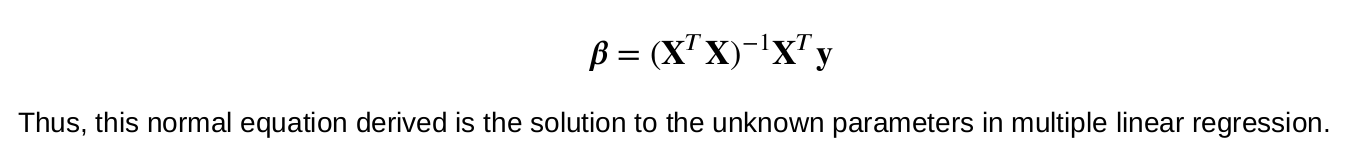

In [11]:
X = np.concat((np.ones((200,1)), X), axis = 1)

In [15]:
beats = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(Y)

In [21]:
beats = beats.flatten()

In [23]:
print(f"y = {beats[0]:.3f} + {beats[1]:.3f} * x1 + {beats[2]:.3f} * x2")

y = 2.921 + 0.046 * x1 + 0.188 * x2


## SKlearn Implementation

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [38]:
X = data_df[['TV','radio','newspaper']].to_numpy()
Y = data_df[['sales']].to_numpy()

In [39]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test  = train_test_split(X,Y, test_size=0.2, random_state=999)

In [41]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [42]:
lin_reg.intercept_

array([3.24035693])

In [43]:
lin_reg.coef_

array([[ 0.04553694,  0.18233378, -0.00428928]])

In [44]:
y_pred = lin_reg.predict(X_test)

In [45]:
r2_score(y_test, y_pred)

0.8928645182685833